<a href="https://colab.research.google.com/github/vasthav2k/deeplearning/blob/master/WEEK3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import tensorflow as tf

In [0]:
mnist=tf.keras.datasets.fashion_mnist

In [0]:
(train_images,train_label),(test_images,test_label)=mnist.load_data()
train_images=train_images.reshape(60000, 28, 28, 1)
test_images = test_images.reshape(10000, 28, 28, 1)

In [0]:
train_images=train_images/255.0
test_images=test_images/255.0

In [0]:
model=tf.keras.models.Sequential([
                                  tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),input_shape=(28,28,1)),
                                  tf.keras.layers.MaxPool2D(pool_size=(2,2)),
                                  tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3)),
                                  tf.keras.layers.MaxPool2D(pool_size=(2,2)),
                                  tf.keras.layers.Flatten(),
                                  tf.keras.layers.Dense(units=128,activation="relu"),
                                  tf.keras.layers.Dense(units=10,activation='softmax')
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [0]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_7 (Dense)              (None, 10)               

In [0]:
model.fit(train_images,train_label,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 76s 41ms/step - loss: 0.4318 - accuracy: 0.8410
Epoch 2/5
1875/1875 [==============================] - 76s 40ms/step - loss: 0.2888 - accuracy: 0.8936
Epoch 3/5
1875/1875 [==============================] - 76s 40ms/step - loss: 0.2414 - accuracy: 0.9107
Epoch 4/5
1875/1875 [==============================] - 76s 41ms/step - loss: 0.2044 - accuracy: 0.9245
Epoch 5/5
1875/1875 [==============================] - 76s 41ms/step - loss: 0.1724 - accuracy: 0.9354


In [0]:
model.evaluate(test_images,test_label)

313/313 [==============================] - 4s 12ms/step - loss: 0.2707 - accuracy: 0.9057


[0.27070125937461853, 0.9057000279426575]

In [0]:
import cv2

In [0]:
import numpy as np
from scipy import misc
i=misc.ascent()

In [0]:
i.shape

(512, 512)

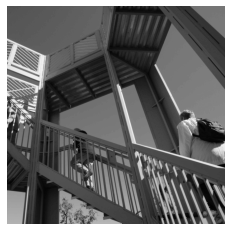

In [0]:
import matplotlib.pyplot as plt
plt.gray()
plt.axis(False)
plt.imshow(i)


In [0]:
i_trans=i.copy()
trans_x=i_trans.shape[0]
trans_y=i_trans.shape[1]
print(trans_x,trans_y)

512 512


In [0]:
print(i_trans[:3,:3])

[[83 83 83]
 [82 82 83]
 [80 81 83]]


In [0]:
filter=[
        [1,0,-1],
        [1,0,-1],
        [1,0,-1],
]

In [0]:
filter = [ [-1, -2, -1], [0, 0, 0], [1, 2, 1]]

In [0]:
conv=np.zeros((trans_x-2,trans_y-2))

In [0]:
for x in range(1,trans_x-1):
  for y in range(1,trans_y-1):
    convolution=0
    convolution+=i[x-1,y-1]*filter[0][0]
    convolution+=i[x-1,y]*filter[0][1]
    convolution+=i[x-1,y+1]*filter[0][2]
    convolution+=i[x,y-1]*filter[1][0]
    convolution+=i[x,y]*filter[1][1]
    convolution+=i[x,y+1]*filter[1][2]
    convolution+=i[x+1,y-1]*filter[2][0]
    convolution+=i[x+1,y]*filter[2][1]
    convolution+=i[x+1,y+1]*filter[2][2]
    if(convolution<0):
      convolution=0
    elif(convolution>255):
      convolution=255
    i_trans[x,y]=convolution


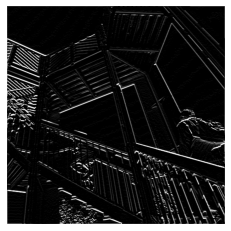

In [0]:
plt.gray()
plt.grid(False)
plt.imshow(i_trans)
plt.axis('off')
plt.show() 

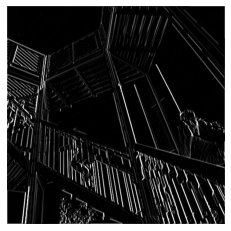

In [0]:
plt.gray()
plt.grid(False)
plt.imshow(i_trans)
plt.axis('off')
plt.show() 